In [2]:
import tensorflow as tf

In [3]:
from eot_model import EoTNetwork, Attention

In [5]:
model = tf.keras.models.load_model("reconstructor.keras", custom_objects={
    "EotNetwork": EoTNetwork,
    "Attention": Attention
})

ValueError: The `data_format` argument must be one of {'channels_first', 'channels_last'}. Received: data_format=(2, 2)

In [ ]:
model.summary()

Model: "eo_t_network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 60, 128)        │        34,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention (Attention)           │ ?                      │           188 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 1, 256)         │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_1 (Attention)         │ ?                      │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 1, 512)         │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_2 (Attention)         │ ?                      │           513 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 1, 1024)        │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_3 (Attention)         │ ?                      │         1,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 1, 2048)        │    16,785,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_4 (Attention)         │ ?                      │         2,049 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 2048)        │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 128)         │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 256)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1, 512)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1, 2)           │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,324,808 (260.64 MB)

 Trainable params: 22,772,290 (86.87 MB)

 Non-trainable params: 7,936 (31.00 KB)

 Optimizer params: 45,544,582 (173.74 MB)

In [ ]:
from eot_data import generate_dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# generate one sample
sequences, labels = generate_dataset(num_samples=4)

# predict
prediction = model.predict(sequences, verbose=1)
pred_x, pred_y = prediction[0][0]

# extract first trajectory
sequence = sequences[0]   # shape (60, 3)
label = labels[0]         # shape (2,)

# split coordinates
x_t = sequence[:, 0]
y_t = sequence[:, 1]
z_t = sequence[:, 2]

# ground truth landing point
x_land, y_land = label

# compute error
error = np.sqrt((pred_x - x_land)**2 + (pred_y - y_land)**2)
print("prediction:", prediction[0])
print("ground truth:", label)
print("euclidean error:", error)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# trajectory
ax.plot(x_t, y_t, z_t, label="trajectory")

# ground truth
ax.scatter(x_land, y_land, 0, s=100, label="ground truth")

# prediction
ax.scatter(pred_x, pred_y, 0, s=100, label="prediction")

ax.set_xlabel("x (court width)")
ax.set_ylabel("y (court length)")
ax.set_zlabel("z (height)")
ax.set_title("trajectory")

ax.legend()
plt.show()

NameError: name 'model' is not defined

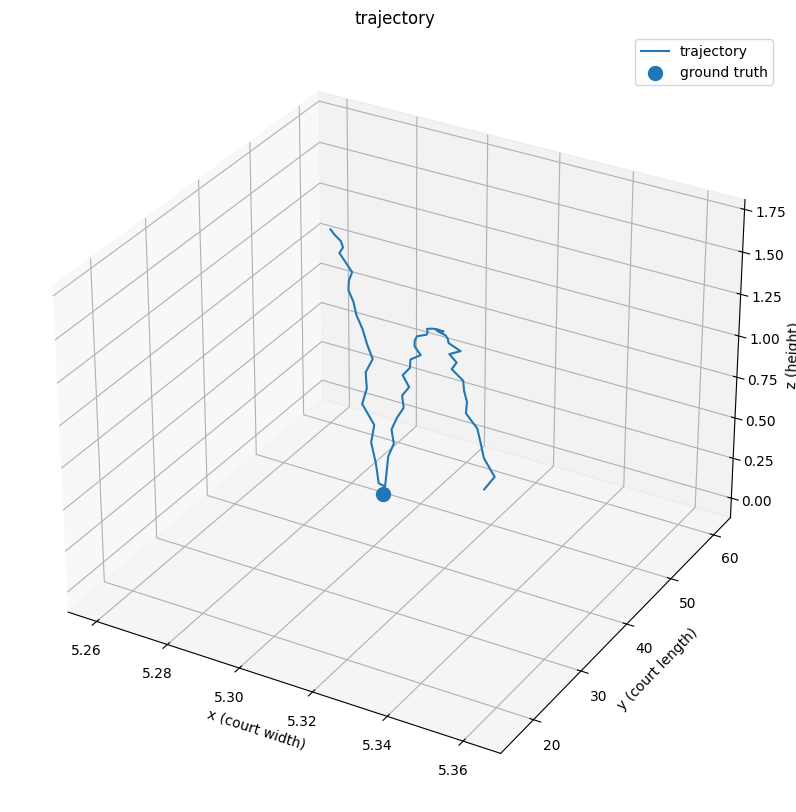

In [ ]:
from eot_data import generate_dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# generate one sample
sequences, labels = generate_dataset(num_samples=1, seq_len=120)

# extract first trajectory
sequence = sequences[0]   # shape (60, 3)
label = labels[0]         # shape (2,)

# split coordinates
x_t = sequence[:, 0]
y_t = sequence[:, 1]
z_t = sequence[:, 2]

# ground truth landing point
x_land, y_land = label


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# trajectory
ax.plot(x_t, y_t, z_t, label="trajectory")

# ground truth
ax.scatter(x_land, y_land, 0, s=100, label="ground truth")

ax.set_xlabel("x (court width)")
ax.set_ylabel("y (court length)")
ax.set_zlabel("z (height)")
ax.set_title("trajectory")

ax.legend()
plt.show()